### Titanic - fastai

In [41]:
import pandas as pd
from fastai.tabular.all import *

In [42]:
# Read titanic dataset
df = pd.read_csv('titanic-dataset/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


We need to put data in *DataLoaders* (dls) class in fastai. To do that, we have wrapper around *DataLoader* for tabular datam which is called *TabularDataLoaders*

In [43]:
# Use fastai RandomSplitter to train-test-split data (df)
splits = RandomSplitter(seed=42)(df)

In [44]:
"""
y_block = CategoryBlock() - our target value is encoded (survived or not survived), so we need to explicitly pass this value so fastai won't presume we are doing regression
"""
tp = TabularPandas(
    df,
    splits=splits,
    procs=[Categorify, FillMissing, Normalize],
    cat_names=['Pclass', 'Sex', 'Embarked'],
    cont_names=['Age', 'SibSp', 'Parch', 'Fare'],
    y_names='Survived',
    y_block=CategoryBlock()
)

In [45]:
# See what is inside tabular pandas object
tp.__dict__

{'dataloaders': <bound method FilteredBase.dataloaders of      PassengerId  Survived  Pclass                                   Name  \
 788          789         1       3             Dean, Master. Bertram Vere   
 525          526         0       3                     Farrell, Mr. James   
 821          822         1       3                      Lulic, Mr. Nikola   
 253          254         0       3               Lobb, Mr. William Arthur   
 374          375         0       3             Palsson, Miss. Stina Viola   
 ..           ...       ...     ...                                    ...   
 770          771         0       3                 Lievens, Mr. Rene Aime   
 414          415         1       3              Sundman, Mr. Johan Julian   
 540          541         1       1                Crosby, Miss. Harriet R   
 298          299         1       1                  Saalfeld, Mr. Adolphe   
 489          490         1       3  Coutts, Master. Eden Leslie "Neville"   
 
     

In [46]:
# Create DataLoaders
dls = tp.dataloaders(bs=64)

In [47]:
dls.show_batch()

,Pclass,Sex,Embarked,Age_na,Age,SibSp,Parch,Fare,Survived
0,3,male,S,False,34.0,1.689237e-09,-9.897945e-09,8.049999,0
1,2,female,S,False,2.0,1.000000e+00,1.000000e+00,26.000000,1
2,3,male,S,False,33.0,1.689237e-09,-9.897945e-09,8.654200,0
3,3,male,S,False,21.0,1.689237e-09,-9.897945e-09,7.800000,0
4,1,male,C,False,25.0,1.000000e+00,-9.897945e-09,55.441699,1
5,2,female,S,False,24.0,1.689237e-09,-9.897945e-09,13.000001,1
6,3,male,C,True,28.0,1.689237e-09,-9.897945e-09,7.225000,0
7,3,male,C,False,45.5,1.689237e-09,-9.897945e-09,7.225000,0
8,3,male,S,False,37.0,2.000000e+00,-9.897945e-09,7.925000,0
9,3,male,S,False,35.0,1.689237e-09,-9.897945e-09,7.125000,0


### Model Training

In [48]:
# Create a learner  using dls with specific metric
learner = tabular_learner(dls, metrics=accuracy, layers=[10,10])

SuggestedLRs(slide=0.0831763744354248, valley=0.019054606556892395)

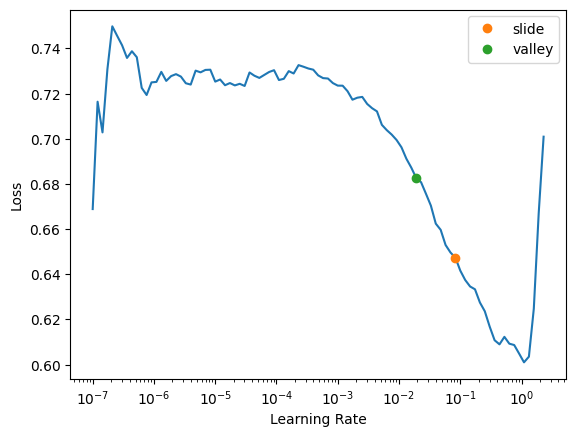

In [49]:
# Choose a good learning rate (something between slide and valley)
learner.lr_find(suggest_funcs=(slide, valley))

In [50]:
# fit the learner on n_epochs with specified lr
learner.fit(16, lr=0.04)

In [51]:
# We can save model as .pkl file
# learner.export(fname='exportLearner.pkl')

### Predictions

In [52]:
# Read test set
test_df = pd.read_csv('titanic-dataset/test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [53]:
# There are NaN value in 'Fare' but not in setup training set
test_df['Fare'] = test_df.Fare.fillna(0)
test_df.Fare.isna().sum()

0

In [54]:
# test_dl method apply all processing steps on test set. No need to manually change anything
test_dls = learner.dls.test_dl(test_df)

In [55]:
# See what is inside test_dls
test_dls.__dict__

{'after_item': Pipeline: ,
 'before_batch': Pipeline: ,
 'after_batch': Pipeline: ReadTabBatch,
 '__stored_args__': {'dataset':      PassengerId  Pclass                                          Name  Sex  \
  0            892       3                              Kelly, Mr. James    2   
  1            893       3              Wilkes, Mrs. James (Ellen Needs)    1   
  2            894       2                     Myles, Mr. Thomas Francis    2   
  3            895       3                              Wirz, Mr. Albert    2   
  4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   
  ..           ...     ...                                           ...  ...   
  413         1305       3                            Spector, Mr. Woolf    2   
  414         1306       1                  Oliva y Ocana, Dona. Fermina    1   
  415         1307       3                  Saether, Mr. Simon Sivertsen    2   
  416         1308       3                           Ware, Mr. F

In [56]:
# get predictions
preds, targs = learner.get_preds(dl=test_dls)

In [57]:
# Print first five predictions
preds[0:5]

tensor([[0.9341, 0.0659],
        [0.5582, 0.4418],
        [0.9573, 0.0427],
        [0.8353, 0.1647],
        [0.6171, 0.3829]])

### Submit

In [58]:
# Create a submission CSV for Kaggle
test_df['Survived'] = (preds[:, 1]>0.5).int()
sub_df = test_df[['PassengerId', 'Survived']]
sub_df.to_csv('submission/sub-fastai.csv', index=False)

In [59]:
!head 'submission/sub-fastai.csv'

PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1
